<a href="https://colab.research.google.com/github/643020514-7/643020514-7/blob/main/Project1_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. นายภูริศ เครืชารี 643020514-7 <phuris.k@kkumail.com>
2. นายธนพร ก้านกื่ง 643021264-9 <Thanaphorn.ka@kkumail.com>
3. นางสาวพิมพิกา ยอดศรี 643020511-3   <phimphika.y@kkumail.com>
4. นายปิยพัทธ์ ปานะถึก

**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [31]:
!pip3 install wordcloud

In [32]:
!pip3 install twitter-scraper-selenium

# Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

####Load these libraries

In [33]:
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

####Mount with google drive

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Read JSON file

In [35]:
# read the file


In [36]:
file = open('/content/drive/MyDrive/python warehouse/thailand_tweets.txt','r') # rename
foo = file.read()
d = json.loads(foo)

In [37]:
# inspect the file
d

'{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography \\n@tombraider\\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider"

#### Pretty print json/dict object

In [38]:
thai_tweets  = json.loads(d)
pretty_json = json.dumps(thai_tweets, indent=25)
print(pretty_json)

{
                         "1564764893038882816": {
                                                  "tweet_id": "1564764893038882816",
                                                  "username": "matthunter",
                                                  "name": "MATT HUNT\u039eR",
                                                  "profile_picture": "https://twitter.com/matthunter/photo",
                                                  "replies": 2,
                                                  "retweets": 1,
                                                  "likes": 7,
                                                  "is_retweet": false,
                                                  "posted_time": "2022-08-30T23:59:57+00:00",
                                                  "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ",
                                                  "hashtags": [],
               

Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

# Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

##1. The total number of tweets collected in the file:

In [39]:
len(set(thai_tweets)) #how to 1

29

In [40]:
all_key = list(thai_tweets.keys())[:]  #how to 2

num_all_key = len(all_key)
print(f'จำนวนtweetsทั้งหมดคือ',num_all_key)

จำนวนtweetsทั้งหมดคือ 29


##2. The content of the first tweet:

In [41]:
first_key = list(thai_tweets.keys())[0]  #
first_content = thai_tweets[first_key]['content']

print(f'contentแรก คือ:',first_content)

contentแรก คือ: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 


##3. Is the first tweet contained any hashtags or mentions?

In [42]:
first = thai_tweets[first_key]
keys=['hashtags','mentions']                      ### ทดสอบ ###

hm = list( map(first.get, keys) )


if not any(isinstance(item, str) for item in hm):
    print("empty")
else:
    print("not empty")



empty


In [43]:

# tweet แรกพร้อม hashtags และ mentions
first_tweet_id = next(iter(thai_tweets))
first_tweet_name = thai_tweets[first_tweet_id]['name']
first_tweet_username = thai_tweets[first_tweet_id]['username']
first_tweet_hashtags = thai_tweets[first_tweet_id]['hashtags']
first_tweet_mentions = thai_tweets[first_tweet_id]['mentions']
first_tweet_content = thai_tweets[first_tweet_id]['content']

print("Username:", (first_tweet_username))
print("name:", (first_tweet_name))
print("ในเนื้อหา:", (first_tweet_content))
# ตรวจสอบว่าทวีตแรกมี hashtags และ mentionsไหม และ print ออกมา
if first_tweet_hashtags:
    print("Hashtags:", ', '.join(first_tweet_hashtags))
else:
    print("ไม่มีแฮชแท็กในทวีตนี้.")

if first_tweet_mentions:
    print("Mentions:", ', '.join(first_tweet_mentions))
else:
    print("ไม่มีการกล่าวถึงในทวีตนี้.")


Username: matthunter
name: MATT HUNTΞR
ในเนื้อหา: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
ไม่มีแฮชแท็กในทวีตนี้.
ไม่มีการกล่าวถึงในทวีตนี้.


##3. Collect all hashtags related to Thailand from this data

In [44]:
thailand_hashtags_data = []

for tweet_id, tweet_data in thai_tweets.items():
    content = tweet_data['content']
    hashtags = [tag.strip('#') for tag in content.split() if tag.startswith('#')]  #หาตัวที่ขึ้นต้นด้วย #

    # ตรวจสอบว่าเนื้อหากล่าวถึงประเทศไทยหรือไม่
    if 'thailand' in content.lower():
        thailand_hashtags = [tag for tag in hashtags]

        thailand_hashtags_data.extend(thailand_hashtags)

# ลบแฮชแท็กที่ซ้ำกันโดยแปลงรายการเป็นชุดแล้วกลับเป็นรายการ
thailand_hashtags_data = list(set(thailand_hashtags_data))

print(f'แฮชแท็กทั้งหมดที่เกี่ยวข้องกับประเทศไทยคือ:', thailand_hashtags_data)


แฮชแท็กทั้งหมดที่เกี่ยวข้องกับประเทศไทยคือ: ['Money', 'Def', 'CDNZA', 'fantasy', 'MarkTuan', '제이비', 'เปกผลิตโชค', 'extraterrestrial', 'DonnyPangilinan,', '4', 'pattaya', 'ppkritt', 'faraway', 'JAYB', 'LISA', 'VirtualPhotography', 'Zunshine', 'SDA2022', 'Thailand', 'thailand', 'voteforppkritt', '갓세븐', 'ยิ้ม5พันของโอมภวัต', 'ICYMI', 'GOT7', 'ohmpawat', 'LALISA', 'theotherside', 'PeckPaLitChoke']


##4. Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
* You are free to define your own popularity metric

In [45]:
most_retweeted_tweet = None
most_liked_tweet = None

for tweet_id, data in thai_tweets.items():

    replies = data.get('replies', 0)
    retweets = data.get('retweets', 0)
    likes = data.get('likes', 0)
    username = data.get('username',0)


    if most_retweeted_tweet is None or retweets > most_retweeted_tweet['retweets']:
        most_retweeted_tweet = {'tweet_id': tweet_id, 'retweets': retweets,'username':username}



    if most_liked_tweet is None or likes > most_liked_tweet['likes']:
        most_liked_tweet = {'tweet_id': tweet_id, 'likes': likes,'username': username}


print("Tweet ที่มี Retweet มากที่สุดคือของ:",most_retweeted_tweet['username'],"มียอด Retweet",most_retweeted_tweet['retweets'])
print("Tweet ที่มี Like มากที่สุดคือของ:",most_liked_tweet['username'],"มียอด Like",most_liked_tweet['likes'])

Tweet ที่มี Retweet มากที่สุดคือของ: OhmPawatInter มียอด Retweet 99
Tweet ที่มี Like มากที่สุดคือของ: OhmPawatInter มียอด Like 143


##5. Display the top 5 tweets that are the most popular among your collection

In [46]:
sorted_tweets = sorted(thai_tweets.values(), key=lambda x: x['likes'], reverse=True)

# top 5 tweets
top_5_tweets = sorted_tweets[:5]
for i, tweet in enumerate(top_5_tweets, start=1):
    print(f"Top {i} Tweet:")
    print(f"Username: {tweet['username']}")
    print(f"Likes: {tweet['likes']}")
    print(f"Content: {tweet['content']}")
    print(f"Tweet URL: {tweet['tweet_url']}")
    print("-" * 95)


Top 1 Tweet:
Username: OhmPawatInter
Likes: 143
Content: Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/Thailand…
#ohmpawat #ยิ้ม5พันของโอมภวัต
Tweet URL: https://twitter.com/OhmPawatInter/status/1564764445825458181
-----------------------------------------------------------------------------------------------
Top 2 Tweet:
Username: Zeepruk_jfc
Likes: 32
Content: Can you help me?

tracking number
FMP200001150XX

Does anyone know a shipping company in Thailand that handles this number?
I'm in trouble with no reply even if I contact the caller 

#Zunshine
Tweet URL: https://twitter.com/Zeepruk_jfc/status/1564762341324992513
-----------------------------------------------------------------------------------------------
Top 3 Tweet:
Username: nato_tonyo11
Likes: 18
Content: Good morning  world! And goodmorning to you too #DonnyPangilinan, enjoy Thailand babe and please d

##6. Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

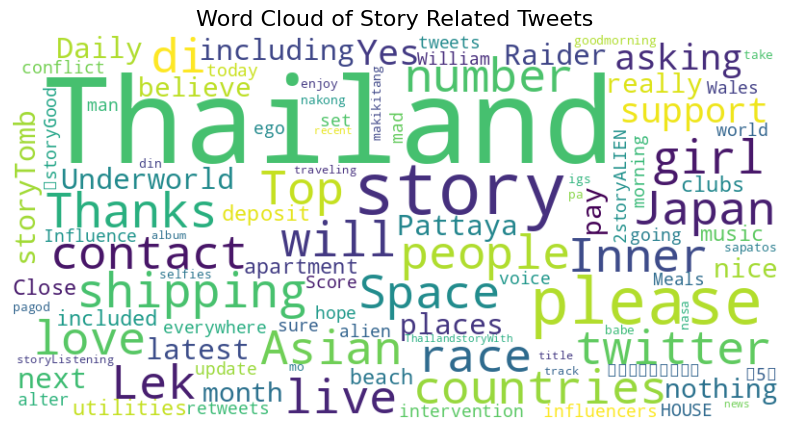

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


tweet_texts = [tweet['content'] for tweet in thai_tweets.values()]

# รวมข้อความtweetทั้งหมดไว้ในสตริงเดียว
combined_text = 'story'.join(tweet_texts)

# ลบ URL ,@ และแฮชแท็ก
combined_text = re.sub(r'http\S+|@\w+|#\w+', '', combined_text)

# สร้าง worldcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(combined_text)

# Plot WordCloud about story
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Story Related Tweets', fontsize=16)
plt.axis('off')
plt.show()


Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

# Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

#----------------------------------------------
##Your code starts here
- label each tweet as positive, negative, and neural sentiment
- combine tweet texts in each type
- tokenize texts
- convert to lower case
- remove stop words
- remove any other stop words, like RT
- remove punctuations
- remove other symbols?
- analyze word frequency in each sentiment type and so on
- create some data visualization for the analysis and your presentation

#Comparator Test

In [48]:
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
hotel = pd.read_csv('/content/drive/MyDrive/python warehouse/tripadvisor_hotel_reviews.csv')

In [50]:
hotel

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [51]:
hotel.columns

Index(['Review', 'Rating'], dtype='object')

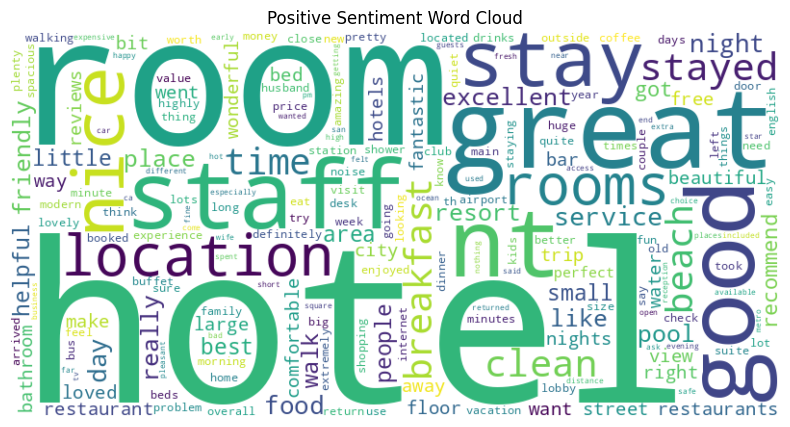

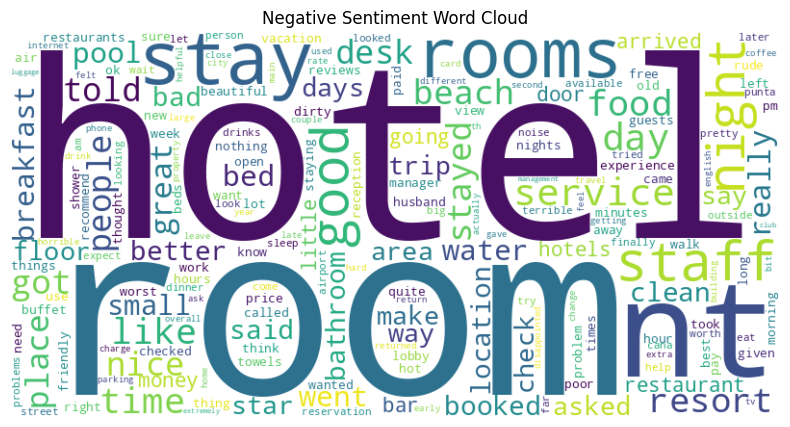

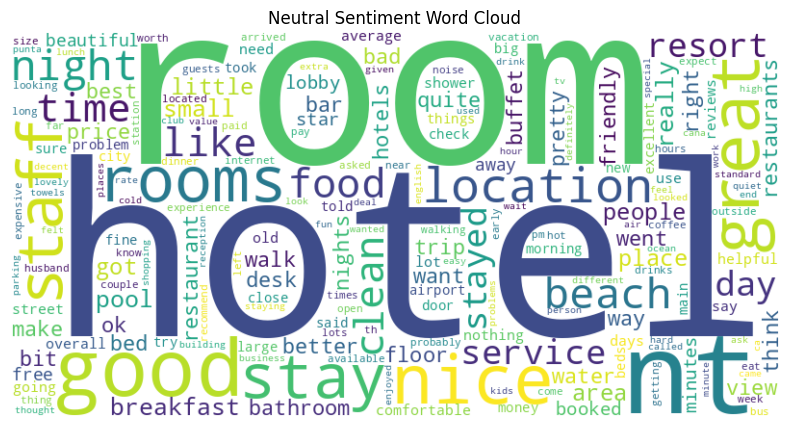

In [52]:
# #สร้าง reviews,ratings
# reviews = hotel['Review']
# ratings = hotel['Rating']

# # สร้าง DataFrame
# df_test = pd.DataFrame({'Review': reviews, 'Rating': ratings})

#ลบคำที่มีความยาวน้อยกว่า 2 :เป็นfunction ชื่อ remove_less_than_2
def remove_less_than_2(words):
    return [word for word in words if len(word) >= 2]

# Tokenization, lowercase conversion, and removing stopwords, RT, จัดการเครื่องหมายต่างๆ
def preprocess_text(text):
    # Tokenization :ใช้ nltk.word_tokenize() เพื่อแยกข้อความใน text ออกเป็นคำๆ
    words = nltk.word_tokenize(text)

    # Convert to lowercase :แปลงทุกคำในลิสต์ words ให้อยู่ในรูปแบบตัวพิมพ์เล็กทั้งหมด
    words = [word.lower() for word in words]

    # Remove stopwords :เพื่อรวบรวมคำหยุด (stop words) ในภาษาอังกฤษ
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words] #ลบ stop_words ออกจาก words

    #  จัดการเครื่องหมายใน:ตัดคำที่ไม่ใช่ตัวอักษร a-z หรือ A-Z ออก.
    words = [re.sub(r'^RT$|[^a-zA-Z]', '', word) for word in words]

    return " ".join(words)

# ใช้ str.split() เพื่อแยกข้อความในแต่ละรีวิวเป็นคำๆ ตามช่องว่าง และนำมาเก็บใน Series ใหม่ โค้ดนี้ใช้ .apply() เพื่อประมวลผลแต่ละรีวิวใน Series(Processed_Review) โดยใช้ฟังก์ชัน remove_less_than_2
#โค้ดนี้ใช้ .str.join(' ') เพื่อรวมคำที่เหลือในแต่ละรีวิวเข้าด้วยกันโดยคั่นด้วยช่องว่าง เก็บผลลัพธ์ในคอลัมน์ 'Processed_Review'
hotel['Processed_Review'] = hotel['Review'].str.split().apply(remove_less_than_2).str.join(' ')

# Filter reviews ตาม rating
positive_reviews = hotel[hotel['Rating'] > 3]
neutral_reviews = hotel[hotel['Rating'] == 3]
negative_reviews = hotel[hotel['Rating'] < 3]



positive_test = []
negative_test = []
neutral_test = []

# นำ text เข้าแต่ละ category
for index, row in positive_reviews.iterrows():
    positive_test.append(preprocess_text(row['Review']))

for index, row in negative_reviews.iterrows():
    negative_test.append(preprocess_text(row['Review']))

for index, row in neutral_reviews.iterrows():
    neutral_test.append(preprocess_text(row['Review']))

# การหาความถี่ของคำ
def word_frequency(text_list):
    words_f = nltk.word_tokenize(" ".join(text_list))
    freq_dist = nltk.FreqDist(words_f)
    return freq_dist

positive_freq_test = word_frequency(positive_test)
negative_freq_test = word_frequency(negative_test)
neutral_freq_test = word_frequency(neutral_test)

# Visualization: สร้าง Word Cloud
def generate_word_cloud(freq_dist, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_word_cloud(positive_freq_test, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_freq_test, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_freq_test, 'Neutral Sentiment Word Cloud')



#Finals

##Import Libraries and Load Data

In [53]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
hotel = pd.read_csv('/content/drive/MyDrive/python warehouse/tripadvisor_hotel_reviews.csv')

##เริ่มต้นด้วยการรวมรีวิวและคะแนนจาก DataFrame ของโรงแรม:
- โค้ดเริ่มต้นด้วยการสร้าง DataFrame ที่ชื่อ df ซึ่งประกอบด้วยข้อมูลรีวิว (reviews) และคะแนน (ratings) จาก DataFrame ของโรงแรม hotel.

In [55]:
#สร้าง reviews,ratings จาก hotel
reviews = hotel['Review']
ratings = hotel['Rating']

# สร้าง DataFrame
df = pd.DataFrame({'Review': reviews, 'Rating': ratings})



##กำหนด Label ให้กับรีวิวตามคะแนน (Sentiment Labeling):
- ใช้ฟังก์ชัน label_sentiment เพื่อกำหนด รีวิวว่าเป็น Positive, Negative, หรือ Neutral โดยอิงตามคะแนน (ratings) ที่รีวิวนั้นมี และเก็บผลลัพธ์ไว้ในคอลัมน์ Sentiment ใน DataFrame df.

In [56]:
# (กำกับการให้คะแนนโดยมี positive,negative,neutral)
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Rating'].apply(label_sentiment)

##รวมรีวิวแต่ละกลุ่ม (Positive, Negative, Neutral):
- นำรีวิวในแต่ละกลุ่ม (Positive, Negative, Neutral) ที่มี Label ตามกลุ่มนั้นๆ มารวมเป็นข้อความเดียวในตัวแปร positive_reviews_a, negative_reviews_a, และ neutral_reviews_a โดยใช้ , เป็นตัวคั่นระหว่างรีวิวแต่ละรีวิว.

In [57]:
# ทำการรวมข้อความของแค่ละreviews คือ positive,negative,neutral โดยใช้ , เป็นตัวคั่นระหว่างข้อความแต่ละรีวิว.
positive_reviews_a = " ".join(df[df['Sentiment'] == 'Positive']['Review'])
negative_reviews_a = " ".join(df[df['Sentiment'] == 'Negative']['Review'])
neutral_reviews_a = " ".join(df[df['Sentiment'] == 'Neutral']['Review'])

# นำข้อความในแต่ละกลุ่มที่รวมไว้แล้วแยกออกมาเป็นรีวิวแต่ละรีวิวด้วยการใช้ , เป็นตัวคั่นและสร้าง DataFrame
aa = positive_reviews_a.split(',')
bb = negative_reviews_a.split(',')
cc = neutral_reviews_a.split(',')

##แยกรีวิวออกเป็นรีวิวแต่ละรีวิว:

In [58]:
# DataFrame แยกตามกลุ่ม
df_pos = pd.DataFrame({'Review': aa})
df_neg = pd.DataFrame({'Review': bb})
df_neu = pd.DataFrame({'Review': cc})

##นำข้อความรีวิวมาวิเคราะห์และใช้ SentimentIntensityAnalyzer:
- ในขั้นตอนนี้, นำข้อความรีวิวที่รวมไว้แต่ละกลุ่มแยกออกมาเป็นแต่ละรีวิวโดยใช้ , เป็นตัวคั่น และสร้าง DataFrame แยกตามกลุ่มของรีวิว คือ df_pos, df_neg, และ df_neu.
-ใช้ SentimentIntensityAnalyzer (sid) เพื่อทำการวิเคราะห์ความรู้สึกของรีวิวในแต่ละกลุ่ม โดยคำนวณคะแนนของความเป็น positive, negative, หรือ neutral และเก็บผลลัพธ์ไว้ใน compound_score1, compound_score2, และ compound_score3.

In [59]:
positive_reviews = []
negative_reviews = []
neutral_reviews = []

sid = SentimentIntensityAnalyzer()

# Zip the three DataFrames together
for review1, review2, review3 in zip(df_pos['Review'], df_neg['Review'],df_neu['Review']):
    # Perform sentiment analysis on each review
    sentiment_scores1 = sid.polarity_scores(review1)
    sentiment_scores2 = sid.polarity_scores(review2)
    sentiment_scores3 = sid.polarity_scores(review3)

    compound_score1 = sentiment_scores1['compound']
    compound_score2 = sentiment_scores2['compound']
    compound_score3 = sentiment_scores3['compound']

     # Combine positive reviews from all three DataFrames
    if compound_score1 >= 0.1:
        positive_reviews.append(review1)
    if compound_score2 >= 0.1:
        positive_reviews.append(review2)
    if compound_score3 >= 0.1:
        positive_reviews.append(review3)

    # Combine negative reviews from all three DataFrames
    if compound_score1 <= -0.1:
        negative_reviews.append(review1)
    if compound_score2 <= -0.1:
        negative_reviews.append(review2)
    if compound_score3 <= -0.1:
        negative_reviews.append(review3)

    # Combine neutral reviews from all three DataFrames
    if -0.1 < compound_score1 < 0.1:
        neutral_reviews.append(review1)
    if -0.1 < compound_score2 < 0.1:
        neutral_reviews.append(review2)
    if -0.1 < compound_score3 < 0.1:
        neutral_reviews.append(review3)

##การทำความสะอาดและLemmatizeข้อความ (Text Preprocessing and Lemmatization):
- ใช้ WordNet Lemmatizer เพื่อเปลี่ยนคำในรูปแบบพื้นฐาน (lemma) และนำไปลบ stopwords และอักขระที่ไม่ใช่ตัวอักษรที่ไม่เป็นตัวอักษร โดยผลลัพธ์จะเป็นรีวิวที่ถูกนำมาทำความสะอาดและเลมมาไทซ์แล้ว.

In [62]:
#การทำความสะอาดและlemmatizeข้อความ
# Create a WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize text
def preprocess_and_lemmatize(text):
    # Tokenization
    words = nltk.word_tokenize(text)

    # Remove specific words like "room" and "hotel"
    words = [word for word in words if word.lower() not in ['room', 'hotel']]

    # Lemmatization
    words = [lemmatizer.lemmatize(word.lower()) for word in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Remove non-alphabetic characters
    words = [re.sub(r'[^a-zA-Z]', '', word) for word in words if word.isalpha()]

    return " ".join(words)

# Apply preprocessing and lemmatization to reviews
positive_reviews = [preprocess_and_lemmatize(review) for review in positive_reviews]
negative_reviews = [preprocess_and_lemmatize(review) for review in negative_reviews]
neutral_reviews = [preprocess_and_lemmatize(review) for review in neutral_reviews]


##การหาความถี่ของคำ (Word Frequency Analysis):
- ใช้ฟังก์ชัน word_frequency เพื่อหาความถี่ของคำในข้อความที่ผ่านการ preprocess แล้วในแต่ละกลุ่ม (positive, negative, neutral) โดยผลลัพธ์จะถูกนำมาสร้างเป็นกราฟความถี่ (word frequency) สำหรับแต่ละกลุ่มของรีวิว (positive, negative, neutral).

In [63]:
# การหาความถี่ของคำ
def word_frequency(text):
    words = nltk.word_tokenize(text)
    freq_dist = nltk.FreqDist(words)
    return freq_dist

positive_freq_dist = word_frequency(" ".join(positive_reviews))
negative_freq_dist = word_frequency(" ".join(negative_reviews))
neutral_freq_dist = word_frequency(" ".join(neutral_reviews))


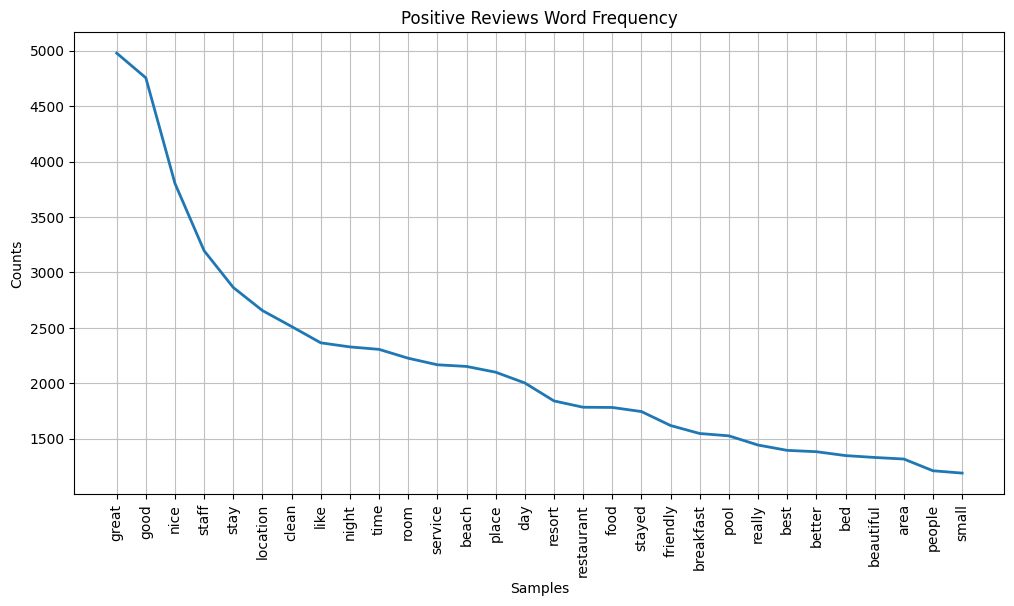

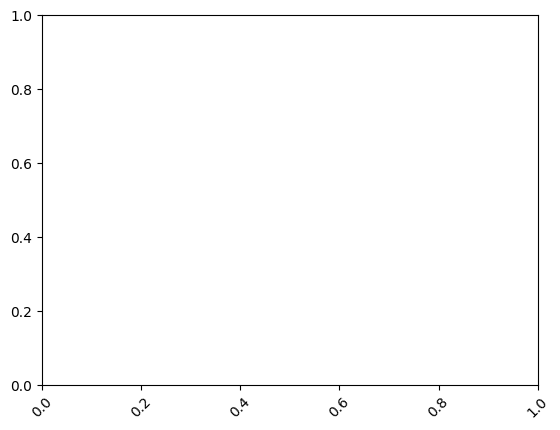

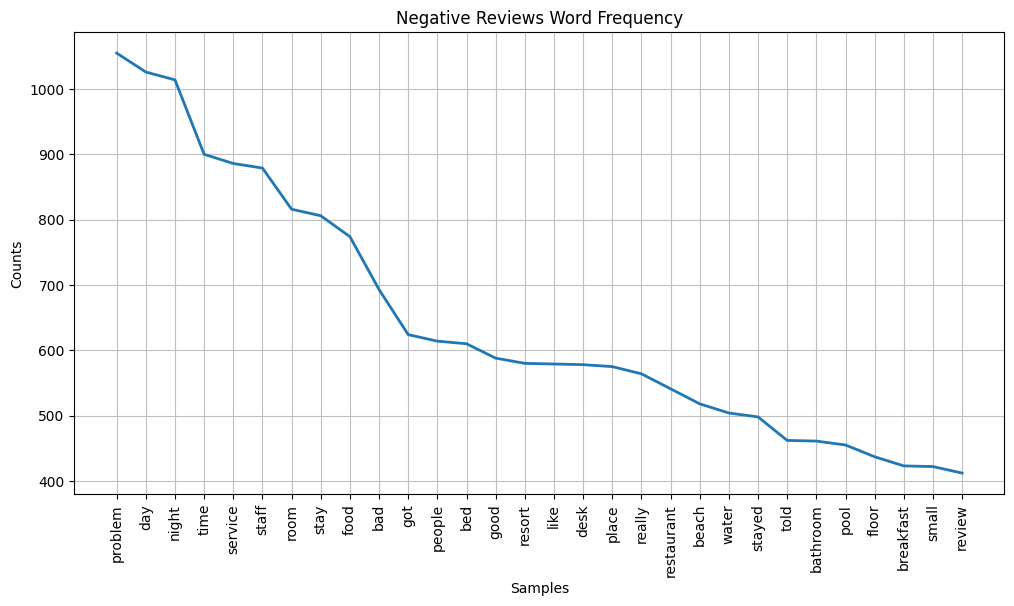

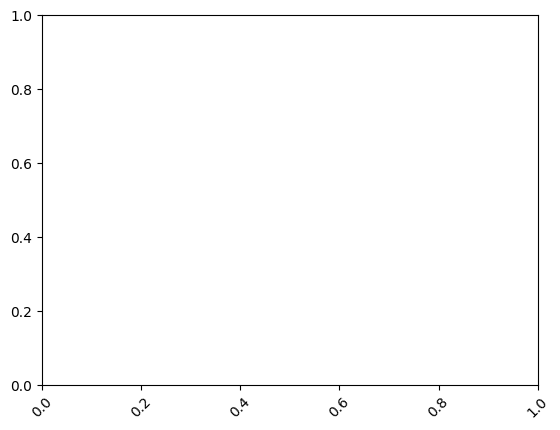

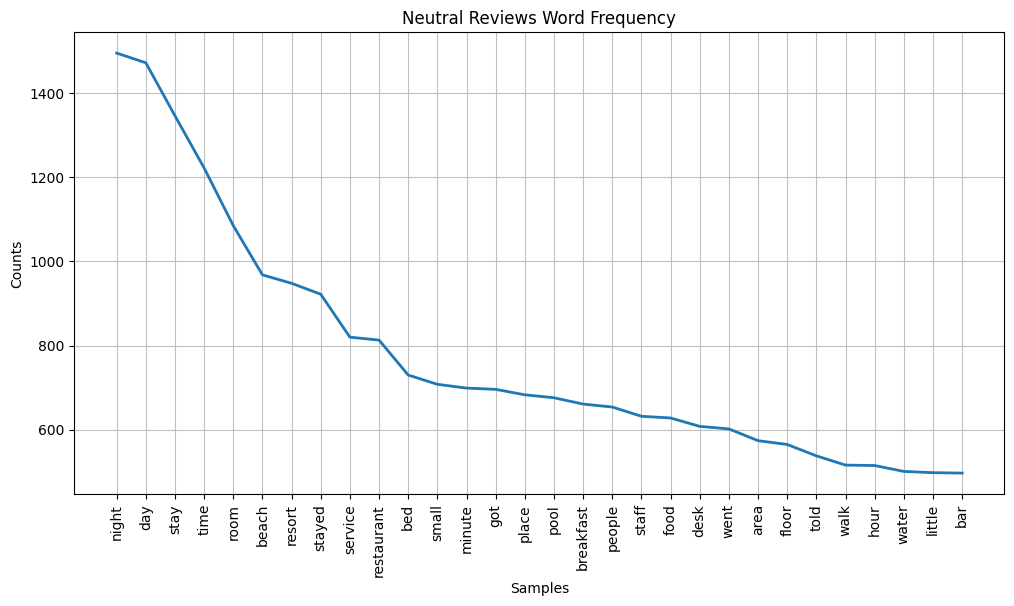

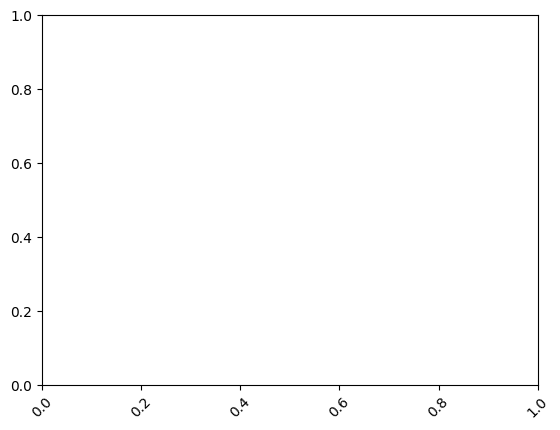

In [77]:
def plot_word_frequency(freq_dist, title):
    plt.figure(figsize=(12, 6))
    freq_dist.plot(30, title=title, cumulative=False)
    plt.xticks(rotation=45)



# Plot word frequency distribution for positive reviews
plot_word_frequency(positive_freq_dist, "Positive Reviews Word Frequency")

# Plot word frequency distribution for negative reviews
plot_word_frequency(negative_freq_dist, "Negative Reviews Word Frequency")

# Plot word frequency distribution for neutral reviews
plot_word_frequency(neutral_freq_dist, "Neutral Reviews Word Frequency")

##การสร้าง Word Cloud:
- ใช้ไลบรารี WordCloud เพื่อสร้าง Word Cloud สำหรับแสดงคำที่มีความถี่กลุ่มคำของรีวิว (positive, negative, neutral). Word Cloud

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

##แสดงผล Word Cloud:
- สุดท้าย, นำ Word Cloud ที่สร้างขึ้นมาแสดงผลสำหรับแต่ละกลุ่ม (positive, negative, neutral) เพื่อแสดงคำที่มีความถี่ของแต่ละกลุ่ม

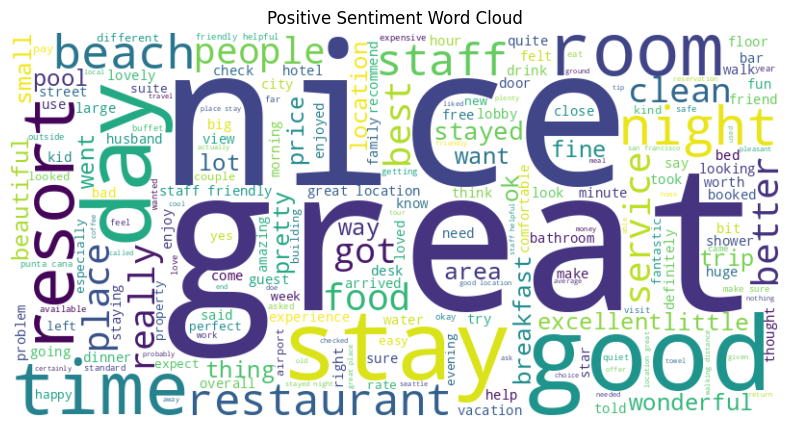

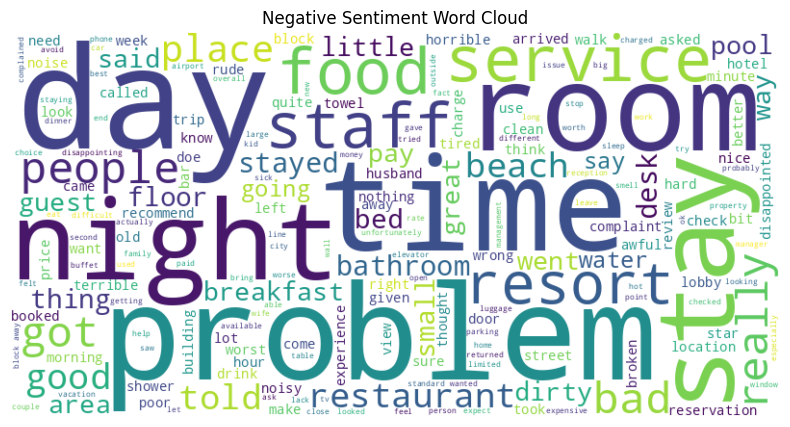

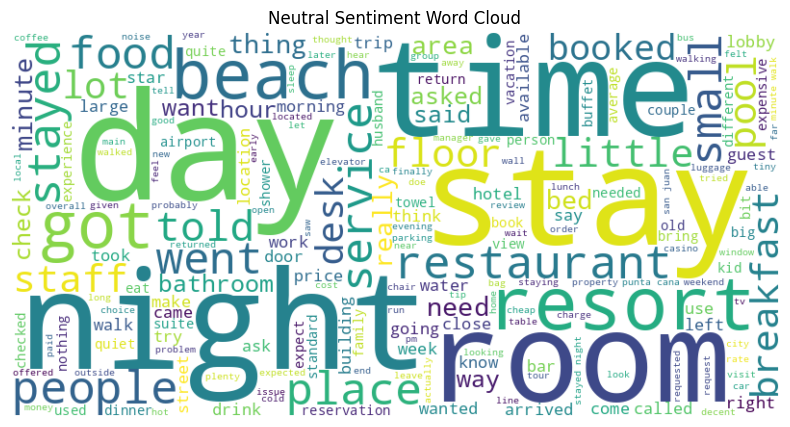

In [65]:
# Generate word clouds for positive, negative, and neutral reviews
generate_word_cloud(" ".join(positive_reviews), 'Positive Sentiment Word Cloud')
generate_word_cloud(" ".join(negative_reviews), 'Negative Sentiment Word Cloud')
generate_word_cloud(" ".join(neutral_reviews), 'Neutral Sentiment Word Cloud')

#report

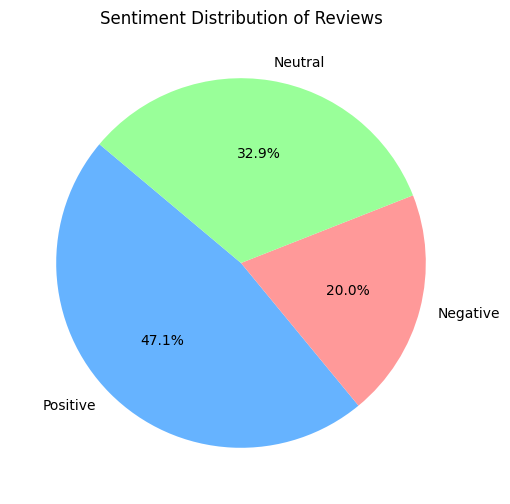

In [66]:
import matplotlib.pyplot as plt

# Count the number of reviews in each sentiment category
positive_count = len(positive_reviews)
negative_count = len(negative_reviews)
neutral_count = len(neutral_reviews)

# Create a list of counts
sentiment_counts = [positive_count, negative_count, neutral_count]

# Labels for each category
labels = ['Positive', 'Negative', 'Neutral']

# Colors for the pie chart
colors = ['#66b3ff','#ff9999' , '#99ff99']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Reviews')
plt.show()


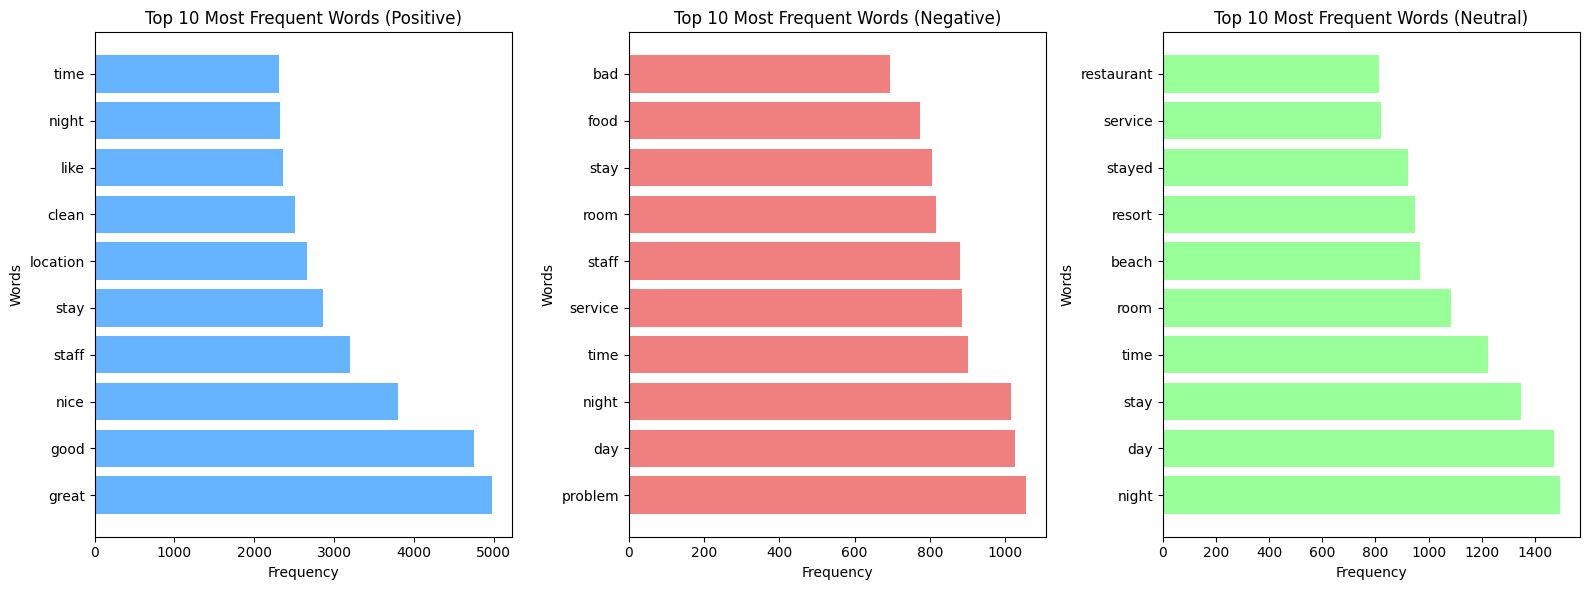

In [70]:
import matplotlib.pyplot as plt

# Calculate word frequencies for Positive reviews
positive_freq_dist = word_frequency(" ".join(positive_reviews))
top_10_positive = positive_freq_dist.most_common(10)
words_positive, frequencies_positive = zip(*top_10_positive)

# Calculate word frequencies for Negative reviews
negative_freq_dist = word_frequency(" ".join(negative_reviews))
top_10_negative = negative_freq_dist.most_common(10)
words_negative, frequencies_negative = zip(*top_10_negative)

# Calculate word frequencies for Neutral reviews
neutral_freq_dist = word_frequency(" ".join(neutral_reviews))
top_10_neutral = neutral_freq_dist.most_common(10)
words_neutral, frequencies_neutral = zip(*top_10_neutral)

# Create a bar chart for Positive reviews
plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.barh(words_positive, frequencies_positive, color='#66b3ff')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words (Positive)')

# Create a bar chart for Negative reviews
plt.subplot(132)
plt.barh(words_negative, frequencies_negative, color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words (Negative)')

# Create a bar chart for Neutral reviews
plt.subplot(133)
plt.barh(words_neutral, frequencies_neutral, color='#99ff99')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words (Neutral)')

plt.tight_layout()  # Ensure proper spacing
plt.show()


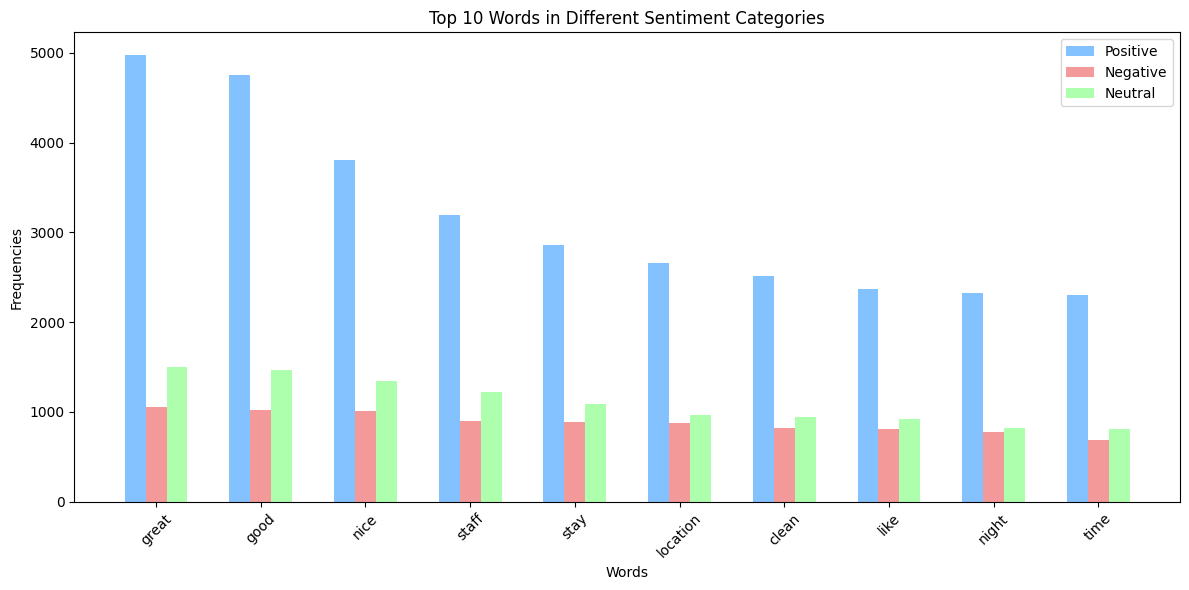

In [69]:
# Function to generate and display a bar chart for word frequencies
def generate_combined_bar_chart(positive_freq_dist, negative_freq_dist, neutral_freq_dist):
    top_words_positive, frequencies_positive = zip(*positive_freq_dist.most_common(10))  # Top 10 words in Positive Reviews
    top_words_negative, frequencies_negative = zip(*negative_freq_dist.most_common(10))  # Top 10 words in Negative Reviews
    top_words_neutral, frequencies_neutral = zip(*neutral_freq_dist.most_common(10))  # Top 10 words in Neutral Reviews

    # Create a combined bar chart
    bar_width = 0.2
    index = range(len(top_words_positive))

    plt.figure(figsize=(12, 6))
    plt.bar(index, frequencies_positive, bar_width, label='Positive', alpha=0.8, color='#66b3ff')
    plt.bar([i + bar_width for i in index], frequencies_negative, bar_width, label='Negative', alpha=0.8, color='lightcoral')
    plt.bar([i + 2 * bar_width for i in index], frequencies_neutral, bar_width, label='Neutral', alpha=0.8, color='#99ff99')


    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.title('Top 10 Words in Different Sentiment Categories')
    plt.xticks([i + bar_width for i in index], top_words_positive, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate and display a combined bar chart for word frequencies in different sentiment categories
generate_combined_bar_chart(positive_freq_dist, negative_freq_dist, neutral_freq_dist)


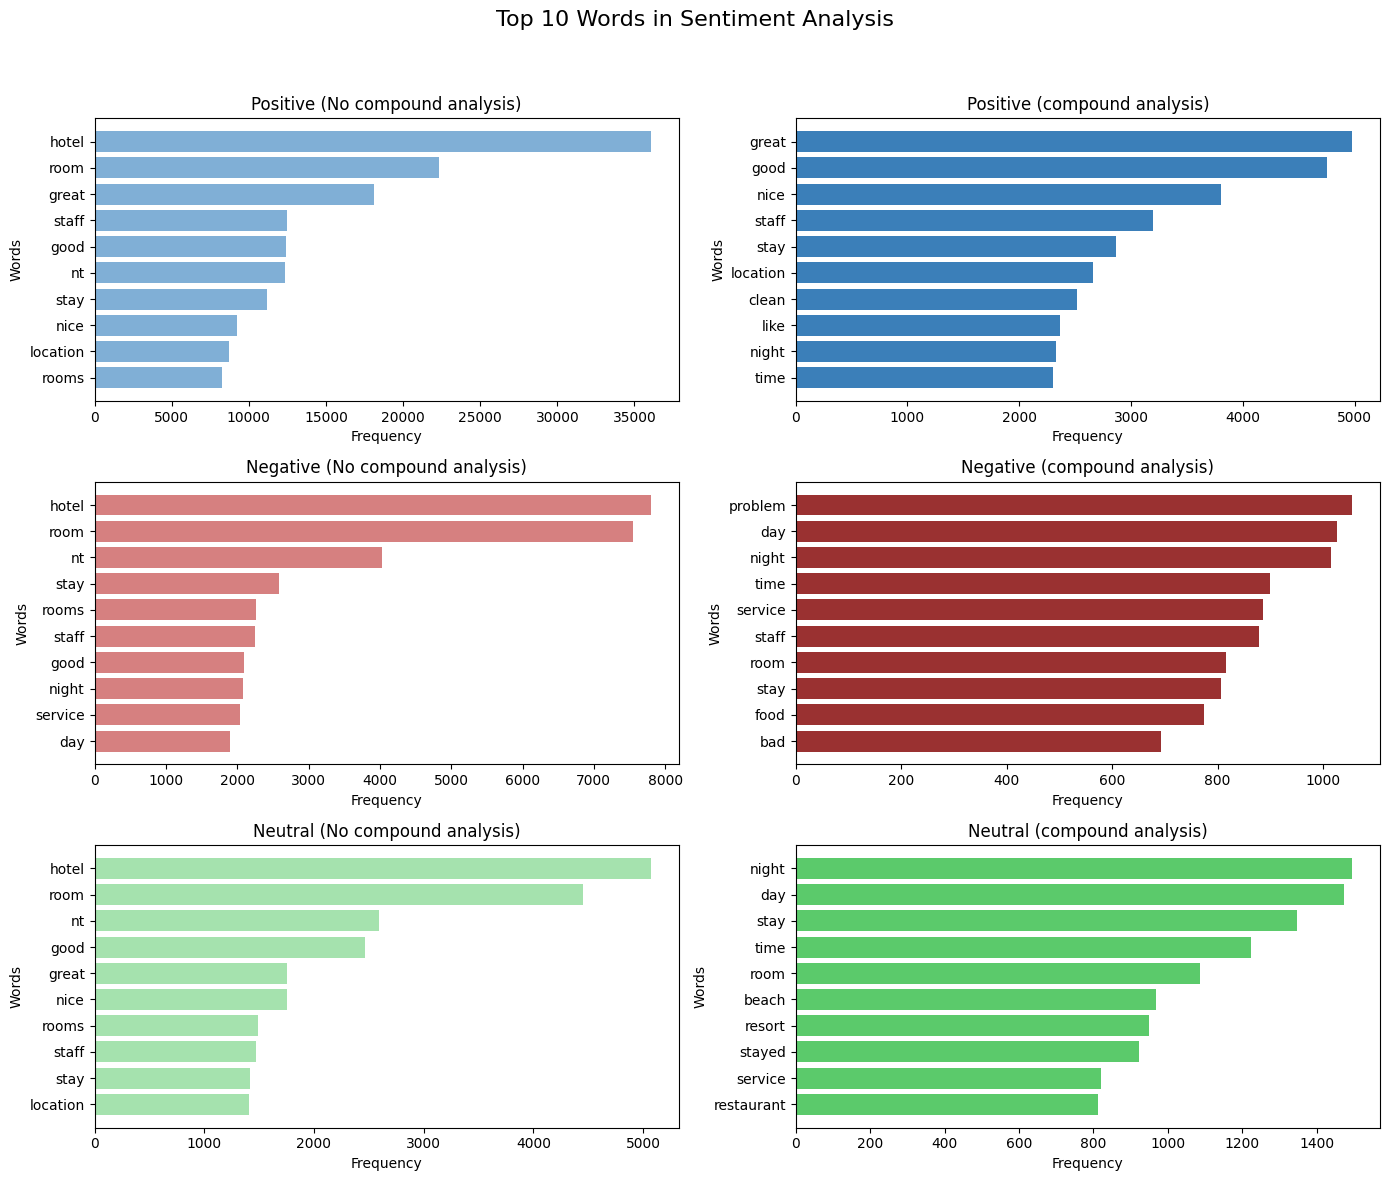

In [71]:

import matplotlib.pyplot as plt
import numpy as np

# Define the categories and colors
categories = ['Positive (No compound analysis)','Positive (compound analysis)', 'Negative (No compound analysis)','Negative (compound analysis)', 'Neutral (No compound analysis)',   'Neutral (compound analysis)']
colors = ['#80afd6', '#3b7fb9', '#d68080', '#9a3131', '#a5e2ae', '#5bca6b']

# Define the data for each category
data = [
    positive_freq_test.most_common(10),
    positive_freq_dist.most_common(10),
    negative_freq_test.most_common(10),
    negative_freq_dist.most_common(10),
    neutral_freq_test.most_common(10),
    neutral_freq_dist.most_common(10)
]

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Top 10 Words in Sentiment Analysis', fontsize=16)

for i in range(len(categories)):
    ax = axs[i // 2, i % 2]
    words, counts = zip(*data[i])
    ax.barh(words, counts, color=colors[i])
    ax.set_xlabel('Frequency')
    ax.set_title(categories[i])
    ax.invert_yaxis()  # Invert the y-axis for better readability

# Set y-axis labels
for ax in axs.flat:
    ax.set(ylabel='Words')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)

# Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

#Topic
##Wikipedia Text Analysis of Artificial Intelligence, Machine Learning, and Deep Learning

##Import Libraries and Load Data

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')


##กำหนด URL และชื่อเรื่องสำหรับบทความ Wikipedia

In [ ]:
# Step 1: Define URLs and Titles for Wikipedia Articles
articles = [
    {"urls": [
        "https://en.wikipedia.org/wiki/Artificial_intelligence",
        "https://en.wikipedia.org/wiki/AI_in_video_games",
        "https://en.wikipedia.org/wiki/Artificial_intelligence_in_healthcare"
    ], "title": "Artificial Intelligence"},
    {"urls": [
        "https://en.wikipedia.org/wiki/Machine_learning",
        "https://en.wikipedia.org/wiki/Supervised_learning",
        "https://en.wikipedia.org/wiki/Unsupervised_learning"
    ], "title": "Machine Learning"},
    {"urls": [
        "https://en.wikipedia.org/wiki/Deep_learning",
        "https://en.wikipedia.org/wiki/Convolutional_neural_network",
        "https://en.wikipedia.org/wiki/Recurrent_neural_network"
    ], "title": "Deep Learning"},
]

##การประมวลผลบทความ
- การทำTokenization และการ clean
- คำนวณความถี่ของคำ

In [ ]:
# Function to process an article and calculate word frequencies
def process_article(urls):
    text_data = ""
    for url in urls:
        try:
            response = urllib.request.urlopen(url)

            if response.status == 200:
                page_content = response.read()
                soup = BeautifulSoup(page_content, 'html.parser')

                # Extract paragraphs from the article
                paragraphs = soup.find_all('p')

                # Concatenate text from all paragraphs
                for paragraph in paragraphs:
                    text_data += paragraph.text
        except urllib.error.HTTPError as e:
            print(f"HTTPError occurred for URL {url}: {e}")

    # Tokenize and Clean Data
    words = word_tokenize(text_data)
    # Remove words with length less than 2 characters
    words = [word.lower() for word in words if word.isalpha() and len(word) >= 2]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Calculate Word Frequencies
    word_freq_dist = nltk.FreqDist(words)
    return word_freq_dist

# Process each article and calculate word frequencies
all_freq_dist = process_article(articles[0]["urls"] + articles[1]["urls"] + articles[2]["urls"])
ai_freq_dist = process_article(articles[0]["urls"])
ml_freq_dist = process_article(articles[1]["urls"])
dl_freq_dist = process_article(articles[2]["urls"])



In [ ]:

# Create DataFrames to display word frequencies
all_df = pd.DataFrame(list(all_freq_dist.items()), columns=["Word", "Frequency"])
ai_df = pd.DataFrame(list(ai_freq_dist.items()), columns=["Word", "Frequency"])
ml_df = pd.DataFrame(list(ml_freq_dist.items()), columns=["Word", "Frequency"])
dl_df = pd.DataFrame(list(dl_freq_dist.items()), columns=["Word", "Frequency"])

# Display the DataFrames
print("All Articles:")
print(all_df.head())
print("\nAI Articles:")
print(ai_df.head())
print("\nML Articles:")
print(ml_df.head())
print("\nDL Articles:")
print(dl_df.head())


In [ ]:
def plot_word_freq(freq_dist, title):
    plt.figure(figsize=(10, 6))
    freq_dist.plot(20, title=title, cumulative=False)
    plt.xlabel('Your Custom X-Axis Label')
    plt.ylabel('Your Custom Y-Axis Label')
    plt.xticks(rotation=45)
    plt.show()

# Plot word frequency graphs for all articles
plot_word_freq(all_freq_dist, 'Word Frequency in All Articles')


In [ ]:
# Function to process an article and calculate word frequencies
def process_article(urls):
    text_data = ""
    for url in urls:
        try:
            response = urllib.request.urlopen(url)

            if response.status == 200:
                page_content = response.read()
                soup = BeautifulSoup(page_content, 'html.parser')

                # Extract paragraphs from the article
                paragraphs = soup.find_all('p')

                # Concatenate text from all paragraphs
                for paragraph in paragraphs:
                    text_data += paragraph.text
        except urllib.error.HTTPError as e:
            print(f"HTTPError occurred for URL {url}: {e}")

##สร้าง Word Cloud

In [ ]:
# Create Word Cloud
def generate_word_cloud(freq_dist, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=300).generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show()

##แสดง Word Cloud

In [ ]:
generate_word_cloud(all_freq_dist, 'All Articles Word Cloud')
generate_word_cloud(ai_freq_dist, 'Artificial Intelligence Word Cloud')
generate_word_cloud(ml_freq_dist, 'Machine Learning Word Cloud')
generate_word_cloud(dl_freq_dist, 'Deep Learning Word Cloud')

##สร้างแผนภูมิ Top 10 Word Frequency Charts

In [ ]:
# Get the top 10 words and their frequencies for each category
ai_top_words, ai_top_freqs = zip(*ai_freq_dist.most_common(10))
ml_top_words, ml_top_freqs = zip(*ml_freq_dist.most_common(10))
dl_top_words, dl_top_freqs = zip(*dl_freq_dist.most_common(10))

# Define colors for each category
ai_color = 'skyblue'
ml_color = 'lightcoral'
dl_color = 'lightgreen'

# Create separate bar charts for each category with different colors
plt.figure(figsize=(18, 6))

# Artificial Intelligence
plt.subplot(131)
plt.bar(ai_top_words, ai_top_freqs, color=ai_color)
plt.title('Artificial Intelligence - Top 10 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Machine Learning
plt.subplot(132)
plt.bar(ml_top_words, ml_top_freqs, color=ml_color)
plt.title('Machine Learning - Top 10 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Deep Learning
plt.subplot(133)
plt.bar(dl_top_words, dl_top_freqs, color=dl_color)
plt.title('Deep Learning - Top 10 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)

# ☃️ The End of Project 1 ☃️